In [1]:
import numpy as np
import math
import csv
from proj1_helpers import *
from Hadrien import *
from ML_methods import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
y, tx, ids = load_csv_data("data_csv/train.csv", sub_sample=True)

print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (5000,)
X has shape (5000, 30)


In [3]:
## TODO : remove NAN before standardization, or at least not consider them in np.mean() and np.std.
tx_nan = transform_to_nan(tx, -900)

In [79]:
tx_nan_norm, mean_x, std_x = standardize_with_nan(tx_nan)
tx_0_nan_norm = transform_nan_to_zero(tx_nan_norm)

In [8]:
def transform_nan_to_mean(x):

    tx = x.copy()  

    for feature in tx:
        feature[np.isnan(feature)] = np.nanmean(feature)
    
    return tx

In [4]:
def display_feature(y, feature, new_feature, nb_bins):
    
    nb_col = 2
    nb_row = 1
    
    feature_true, feature_false, nb_nan = split_data_according_to_truth(feature, y)
    new_feature_true, new_feature_false, new_nb_nan = split_data_according_to_truth(new_feature, y)
 
    fig, axs = plt.subplots(nb_row, nb_col, sharey=False, squeeze=False, tight_layout=False, figsize=(15, 5))

    axs[0, 0].hist([feature_true, feature_false], histtype = 'bar',bins=nb_bins, label=['Higgs', 'No Higgs'])
    axs[0, 0].set_title("Feature with {0}% NAN".format(round(nb_nan/len(feature)*100, 1)))
    axs[0, 0].legend(prop={'size': 10})
    
    axs[0, 1].hist([new_feature_true, new_feature_false], histtype = 'bar',bins=nb_bins, label=['Higgs', 'No Higgs'])
    axs[0, 1].set_title("New Feature with {0}% NAN".format(round(nb_nan/len(feature)*100, 1)))
    axs[0, 1].legend(prop={'size': 10})

    plt.show()
        

In [5]:
def display_plane_feature(feature_1, feature_2, y):
    
    feature_1_true, feature_1_false, nb_1_nan = split_data_according_to_truth(feature_1, y)
    feature_2_true, feature_2_false, nb_2_nan = split_data_according_to_truth(feature_2, y)
    
    plt.scatter(feature_1_false, feature_2_false, c="red", marker="x", linewidth=1)
    plt.scatter(feature_1_true, feature_2_true, c="blue", marker="o", linewidth=0.5)
    
    plt.show()

### 0.

In [22]:
np.nan > -100


False

/home/hadrien/ML/local/projects/project1/Hadrien.py:66: RuntimeWarning: invalid value encountered in greater
  x_true = x[np.where( (y > 0) and (x > thresh))]
/home/hadrien/ML/local/projects/project1/Hadrien.py:67: RuntimeWarning: invalid value encountered in greater
  x_false = x[np.where( (y < 0) and (x > thresh))]


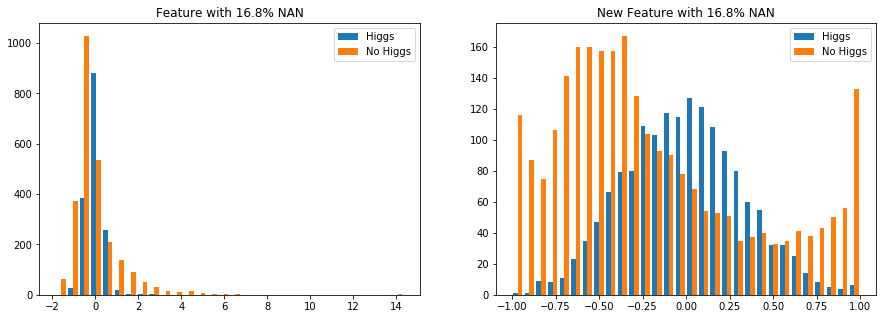

In [42]:
feature = tx_nan_norm[:,0]
new_feature = np.sin(feature)
display_feature(y,feature, new_feature, 30)

### 1.

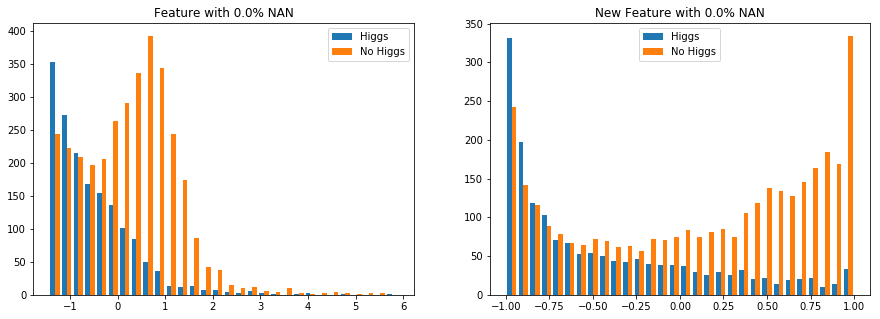

In [13]:
feature = tx_nan_norm[:,1]
new_feature = np.sin(feature)
display_feature(y,feature, new_feature, 30)


### 2.

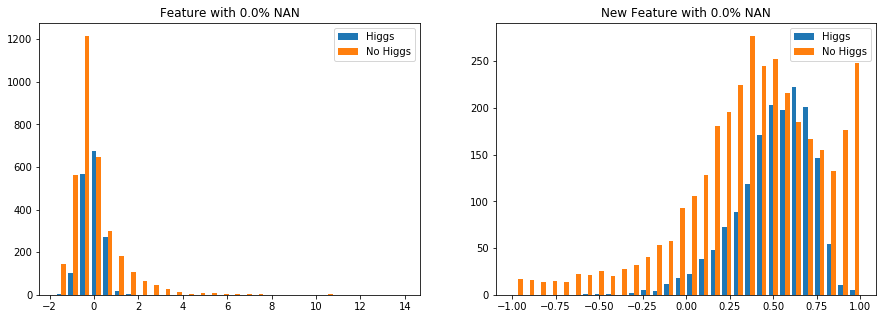

In [20]:
feature = tx_nan_norm[:,2]
new_feature = np.sin(log(feature))
display_feature(y,feature, new_feature, 30)

### 0. * 1.

In [76]:
tx[:,20][np.where(np.logical_and(y> -900, tx[:,20] < 1000))]

array([-0.277,  0.96 ,  0.88 , ..., -0.161, -0.086,  0.497])

In [11]:
tx_nan_mean = transform_nan_to_mean(tx_nan)


In [15]:
print(np.count_nonzero(~np.isnan(tx_nan_mean)))

150000


150000


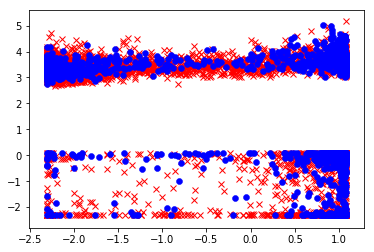

In [66]:
print(np.count_nonzero(~np.isnan(tx_nan_mean)))
feature_1 = log(tx_nan_mean[:,11])
feature_2 = log(tx_nan_mean[:,12])
display_plane_feature(feature_1, feature_2, y)

### 3.

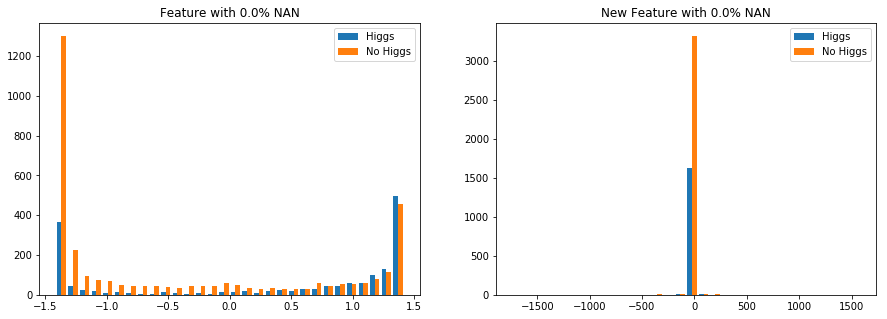

In [67]:
feature = tx_nan_mean[:,11]
new_feature = np.tan(tx_nan_mean[:,12]) 
display_feature(y,feature, new_feature, 30)

### 0. x 4.

/home/hadrien/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/hadrien/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/home/hadrien/ML/local/projects/project1/Hadrien.py:66: RuntimeWarning: invalid value encountered in greater
  x_true = x[np.where(np.logical_and(y > 0, x > thresh))]
/home/hadrien/ML/local/projects/project1/Hadrien.py:67: RuntimeWarning: invalid value encountered in greater
  x_false = x[np.where( np.logical_and(y < 0, x > thresh))]


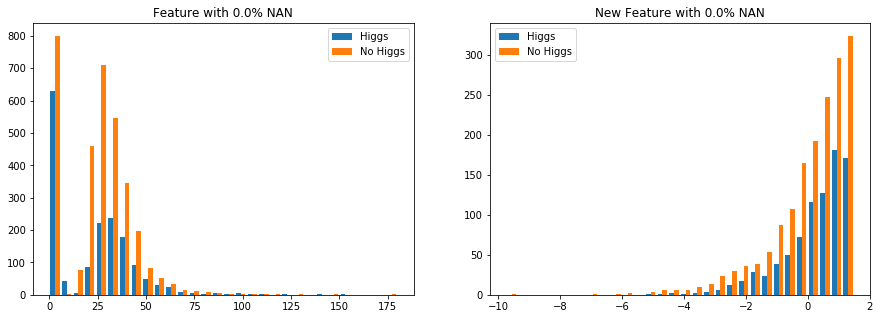

In [69]:
feature = tx_nan_mean[:,4]
new_feature = np.log(tx_nan_mean[:,11]*tx_nan_mean[:,15])
display_feature(y,feature, new_feature, 30)

## PCA analysis

In [64]:
Mean = np.mean(tx, axis = 0)
A = Mean - tx

In [65]:
A.shape

(5000, 30)